# Importing dataset and necessary dependencies

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import re
import string

In [3]:
fdata = pd.read_csv('Fake.csv')
tdata = pd.read_csv('True.csv')

In [4]:
fdata.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
tdata.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fdata['class'] = 0
tdata['class'] = 1

In [7]:
fdata.shape

(23481, 5)

In [8]:
tdata.shape

(21417, 5)

# Creating a manual testing dataset for model validation

In [9]:
fdata_manual_test = fdata.tail(10)
findex = fdata.tail(10).index
fdata.drop(findex,axis=0,inplace=True)
tdata_manual_test = tdata.tail(10)
tindex = tdata.tail(10).index
tdata.drop(tindex,axis=0,inplace=True)

In [10]:
fdata.shape,tdata.shape

((23471, 5), (21407, 5))

In [11]:
fdata_manual_test

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
tdata_manual_test

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


# Merging both fake and true news datasets and preproccesing the datasets 

In [13]:
df = pd.concat([fdata,tdata] , axis = 0)
df.shape

(44878, 5)

In [14]:
df.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
df = df.drop(['title','subject','date'],axis=1)

In [16]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [17]:
df = df.sample(frac=1)
df.head()

,text,class
17121,The news gets worse every day for the Clinton ...,0
1003,HAVANA (Reuters) - The United States said on T...,1
15841,LONDON (Reuters) - British Prime Minister Ther...,1
5395,(Reuters) - The continuing controversy over fo...,1
4537,NEW YORK (Reuters) - The U.S. Environmental Pr...,1


In [18]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.head()

,text,class
0,The news gets worse every day for the Clinton ...,0
1,HAVANA (Reuters) - The United States said on T...,1
2,LONDON (Reuters) - British Prime Minister Ther...,1
3,(Reuters) - The continuing controversy over fo...,1
4,NEW YORK (Reuters) - The U.S. Environmental Pr...,1


In [19]:
#function to remove all the special characters,whitespcaces and punctuations from the text
def preprocess(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\\W'," ",text)
    text = re.sub("https?://\S+|www\.\S+",'',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [20]:
df['text'] = df['text'].apply(preprocess)

# Model building

In [21]:
x = df['text']
y = df['class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(X_train)
xv_test = vectorizer.transform(X_test)

# Logistic Regression model

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train,y_train)

LogisticRegression()

In [25]:
ypred_lr = lr.predict(xv_test)

In [26]:
lr.score(xv_test,y_test)

0.9853832442067736

In [27]:
print(classification_report(y_test,ypred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5845
           1       0.98      0.99      0.98      5375

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



<Axes: >

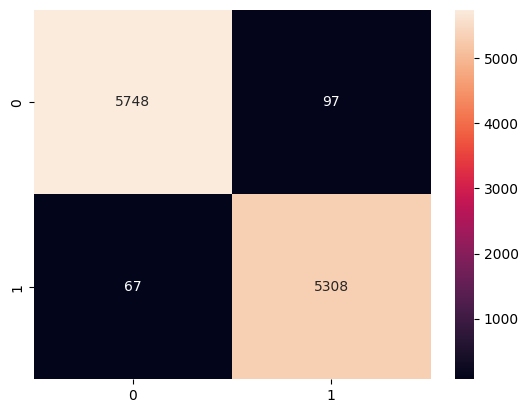

In [28]:
sns.heatmap(confusion_matrix(y_test,ypred_lr),annot=True,fmt='g')

# Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xv_train,y_train)
ypred_dt = dt.predict(xv_test)


In [30]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5845
           1       1.00      1.00      1.00      5375

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



<Axes: >

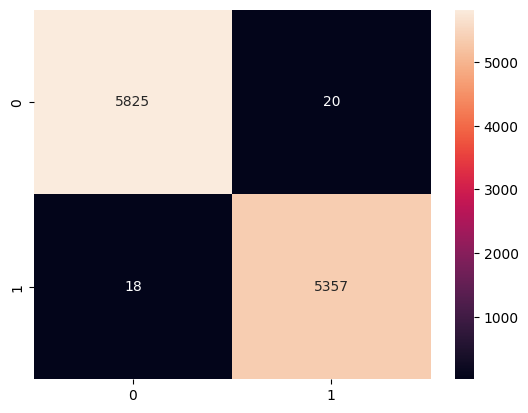

In [31]:

sns.heatmap(confusion_matrix(y_test,ypred_dt),annot=True,fmt='g')

# XGBoost Model

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xv_train,y_train)
predict_xgb = xgb.predict(xv_test)

In [33]:
print(classification_report(y_test,predict_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5845
           1       1.00      1.00      1.00      5375

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



<Axes: >

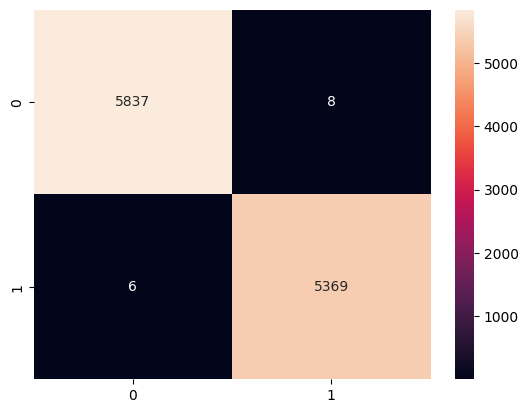

In [34]:
sns.heatmap(confusion_matrix(y_test,predict_xgb),annot=True,fmt='g')

# RandomForest Model

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xv_train,y_train)
ypred_rfc = rfc.predict(xv_test)

In [36]:
print(classification_report(y_test,ypred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5845
           1       0.99      0.99      0.99      5375

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



<Axes: >

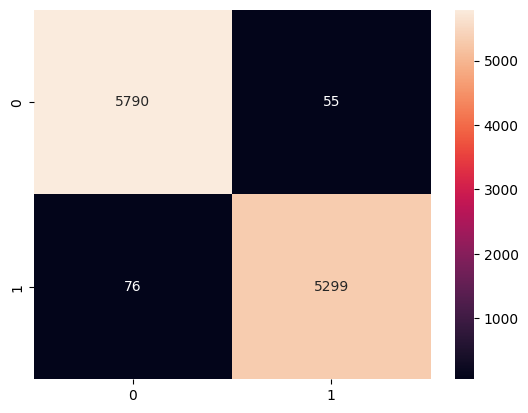

In [37]:
sns.heatmap(confusion_matrix(y_test,ypred_rfc),annot=True,fmt='g')

# Model Validation

In [38]:
def prediction(n):
    if n == 0:
        return "Fake news"
    elif n == 1:
        return "True news"

def Manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(preprocess)
    x_test = new_def_test['text']
    new_xv_test = vectorizer.transform(x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_xgb = xgb.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print("\n\n LR Prediction : {} \n XGB Prediction : {} \n DT Prediction : {} \n RFC Prediction : {}".format(prediction(pred_lr[0]),
                                                                                                                      prediction(pred_xgb[0]),
                                                                                                                      prediction(pred_dt[0]),
                                                                                                                      prediction(pred_rfc[0])))


In [39]:
x1 = tdata_manual_test['text']
news = str(x1.head(1))
Manual_testing(news=news)



 LR Prediction : True news 
 XGB Prediction : True news 
 DT Prediction : True news 
 RFC Prediction : Fake news


In [40]:
x2 = fdata_manual_test['text']
news = str(x1.head(1))
Manual_testing(news=news)



 LR Prediction : True news 
 XGB Prediction : True news 
 DT Prediction : True news 
 RFC Prediction : Fake news


## Predict any news

In [41]:
# news = str(input())
# Manual_testing(news)

# Model deployment

In [42]:
#importing necessary dependencies
import pickle

### LR

In [43]:
pick_lr = open("lr.pkl","wb")
pickle.dump(lr,pick_lr)
pick_lr.close()

### RFC

In [44]:
pick_rfc = open("rfc.pkl","wb")
pickle.dump(rfc,pick_rfc)
pick_rfc.close()

### DT

In [45]:
import pickle
pick_dt = open("dt.pkl","wb")
pickle.dump(dt,pick_dt)
pick_dt.close()

### XGB

In [46]:
import pickle
pick_xgb = open("xgb.pkl","wb")
pickle.dump(xgb,pick_xgb)
pick_xgb.close()

### vectorizer

In [47]:
pkl_vect = open("vect.pkl","wb")
pickle.dump(vectorizer,pkl_vect)
pkl_vect.close()